In [33]:
import numpy as np
from scipy.io import loadmat
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


# SPES Exploration
This is a Single Pulse exploration notebook. The goal here is interact with basic I/O for SPES data and prototype some methods for CRP parameterization 

In [ ]:
# Basic viz
DATA_FOLDER = '/mnt/ernie_main/000_Data/SPES/data/preprocessed/'
file = 'Epat26/Epat26_CCEP_full_trains/Epat26_LA1-LA2_1mA.mat'
spes_trial = loadmat(os.path.join(DATA_FOLDER, file))


In [52]:
spes_trial.keys()
hdr = spes_trial['__header__']
fs = spes_trial['fs'][0][0]
full_train = spes_trial["full_train"]
labels  = [l[0] for l in spes_trial['labels'][0]]
print(f"train datashape: {full_train.shape}, sampled at {fs}")
print(f"First 10 labels: {labels[0:10]} \n\n there are {len(labels)} total labels")

spes_df = construct_spes_df(full_train, labels, fs)

train datashape: (148, 5121), sampled at 512
First 10 labels: ['LTP1', 'LTP2', 'LTP3', 'LTP4', 'LTP5', 'LTP6', 'LTP7', 'LTP8', 'LTP9', 'LTP10'] 

 there are 148 total labels


/tmp/ipykernel_95780/1729882681.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 148 + 1) instead
  rind10 = np.random.random_integers(0,len(labels),10)
/home/ghassan/miniconda3/envs/ephys/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ghassan/miniconda3/envs/ephys/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ghassan/miniconda3/envs/ephys/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mo

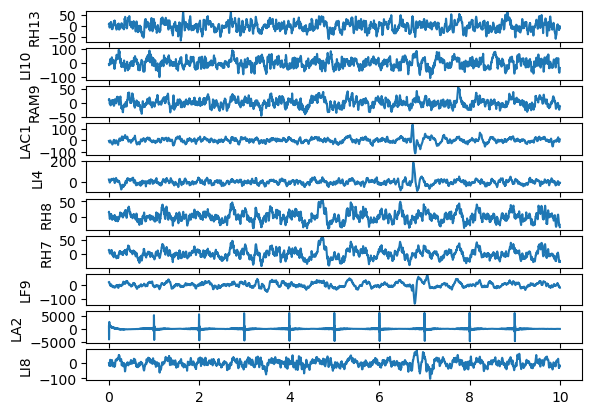

In [59]:
spes_df
rind10 = np.random.random_integers(0,len(labels),10)
chs_to_plot = spes_df.columns[rind10]
plot_channels(spes_df, chs_to_plot)

In [68]:
#TODO need to incorporate artifact removal and then work on cross projection. 
#For now, it would be interesting to get global cross projection

resp_inds = np.where( "LA2" != np.array(labels))
resp_labels = np.array(labels)[resp_inds]

resp_areas = spes_df[spes_df.columns[ resp_inds]].values
full_crossProj = resp_areas.T@resp_areas
df_full_crossProj = pd.DataFrame(data=full_crossProj, columns=resp_labels, index=resp_labels)
sns.heatmap(full_crossProj, cmap="")

(5121, 147)

In [58]:
def construct_spes_df(spes_trains, contact_labels, fs):
    assert len(contact_labels) == min(spes_trains.shape)
    if np.argmax(spes_trains.shape) != 0:
        spes_trains = spes_trains.T
    nsamps,ch = spes_trains.shape
    t = np.arange(nsamps)/fs
    df = pd.DataFrame(columns=contact_labels, index =t, data=spes_trains)
    return  df

def plot_channels(spes_df , channel_list):
    nrows = len(channel_list)
    fig, axes = plt.subplots(nrows=nrows, ncols=1,sharex=True)
    for i,ch in enumerate(channel_list):
        ax = axes[i]
        sns.lineplot(x=spes_df.index, y=spes_df[ch], ax=ax)
    
    